# IMPLEMENTATION OF ARIMA MODEL IN PYTHON 

# Step 1: Import Libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Step 2: Load the Dataset and Create a Pseudo-Time-Series (Group by HouseAge)


In [16]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Add the target 

ts_data = df.groupby('HouseAge')['MedHouseVal'].mean().reset_index()


# Step 3: Visualize the Data and Check for Stationarity (ADF Test)



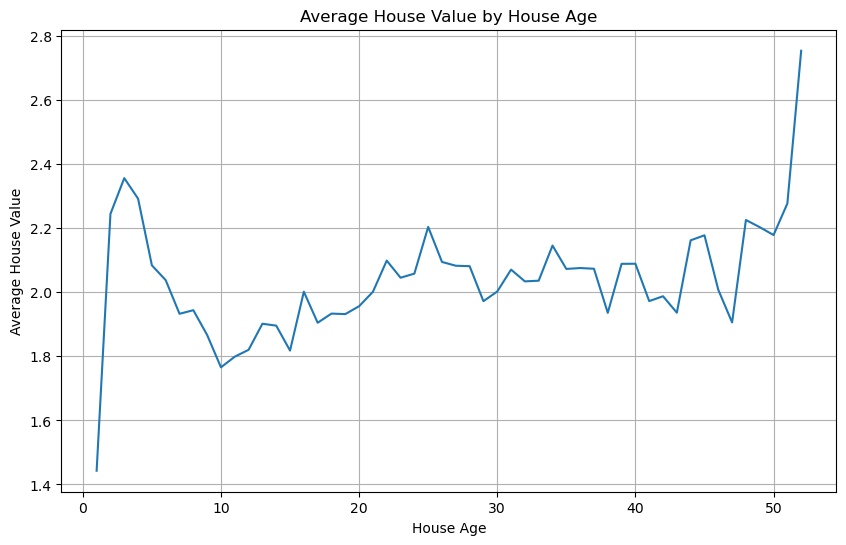

ADF Statistic: -0.6133389878029727
p-value: 0.8679393862082889


In [18]:
plt.figure(figsize=(10, 6))
plt.plot(ts_data['HouseAge'], ts_data['MedHouseVal'])
plt.title('Average House Value by House Age')
plt.xlabel('House Age')
plt.ylabel('Average House Value')
plt.grid(True)
plt.show()

adf_result = adfuller(ts_data['MedHouseVal'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


# Step 4: Apply Differencing and Train-Test Split

In [21]:
ts_data['Diff_Val'] = ts_data['MedHouseVal'].diff()

# Check stationarity again
adf_diff_result = adfuller(ts_data['Diff_Val'].dropna())
print(f"ADF (Differenced) Statistic: {adf_diff_result[0]}")
print(f"p-value (Differenced): {adf_diff_result[1]}")

train_size = int(len(ts_data) * 0.8)
train = ts_data['MedHouseVal'][:train_size]
test = ts_data['MedHouseVal'][train_size:]


ADF (Differenced) Statistic: -6.1189966626889145
p-value (Differenced): 8.949756277120397e-08


# Step 5: Fit ARIMA Model and Forecast 

In [26]:
model = ARIMA(train, order=(2,1,2))  # You can experiment with (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test))


                               SARIMAX Results                                
Dep. Variable:            MedHouseVal   No. Observations:                   41
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  20.783
Date:                Mon, 21 Apr 2025   AIC                            -31.567
Time:                        20:53:39   BIC                            -23.122
Sample:                             0   HQIC                           -28.514
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0743      0.238     -4.518      0.000      -1.540      -0.608
ar.L2         -0.8642      0.238     -3.628      0.000      -1.331      -0.397
ma.L1          1.3383      1.852      0.723      0.4

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Step 6: Evaluate the Model and Plot Forecast vs Actual

MAE: 0.20304543911698802
RMSE: 0.28088297553615404
MAPE: 8.683272182022682%


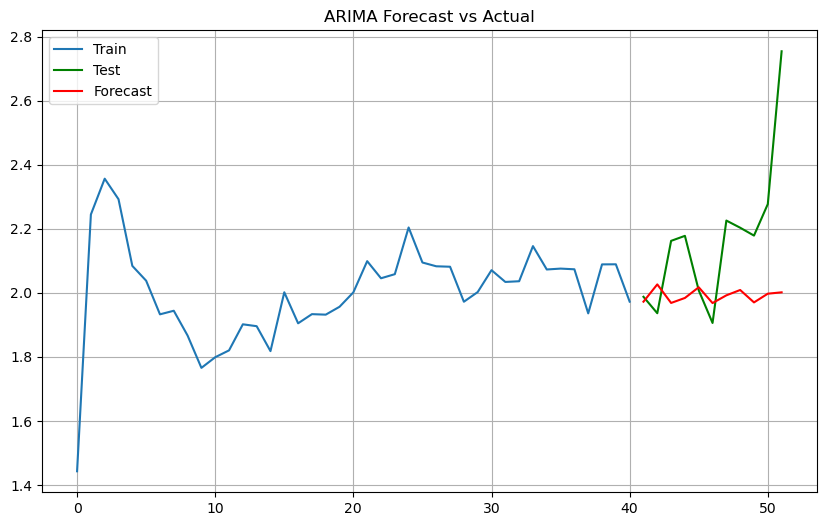

In [31]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.grid(True)
plt.show()
